**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split


**Import Dataset**

In [ ]:
df=pd.read_csv('Crop_recommendation.csv')

**Displaying Dataset**

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


**Checking dataset for NULL Values**

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**Checking Dataset for Duplicate values**

In [ ]:
df.duplicated().sum()

0

**Checking instances for each label**

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Correlation Matrix**

In [ ]:
corr=df.drop(['label'],axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


**Heatmap**

<Axes: >

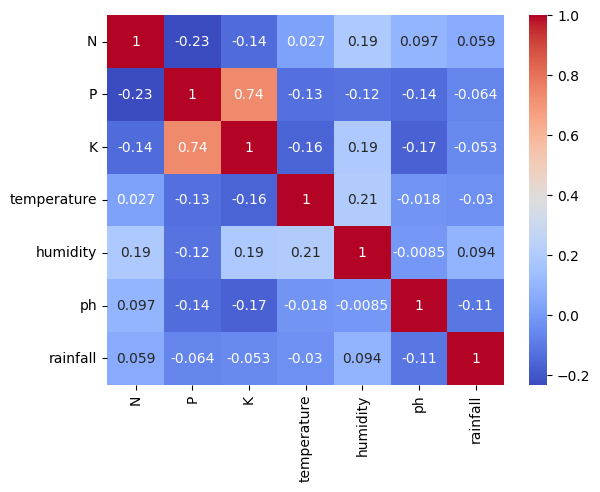

In [ ]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [ ]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
reversed_dict = dict(zip(crop_dict.values(), crop_dict.keys()))

#updating dataframe column/row.map(dictionary_name)
df['crop_num']=df['label'].map(crop_dict)
reversed_dict
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


**Shuffling dataset**

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon,9
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon,10
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya,6
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya,6
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple,8
...,...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange,7
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,banana,13
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,mango,12
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes,11


In [ ]:
df2 = df.drop(['crop_num','label'],axis=1)
df2

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430




**Elbow curve plotting-plotting WCSS(within cluster sum of squares) vs number of clusters**

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,22):
    km = KMeans(n_clusters=i)
    km.fit_predict(df2)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[18820170.463645898,
 12070916.3535335,
 7423978.872783801,
 5337369.950298378,
 4417511.116768204,
 3748646.2079994925,
 3103978.2612548,
 2727858.0937568457,
 2373903.121060769,
 2130906.843878147,
 1950214.885455472,
 1768659.7829524311,
 1647197.739369981,
 1547504.233880171,
 1431676.484264844,
 1327014.4256269005,
 1265404.9665166507,
 1211565.9209567513,
 1159606.6598752365,
 1110000.9139825623,
 1063534.520035146]

**Plotting the curve**

Text(0, 0.5, 'WCSS')

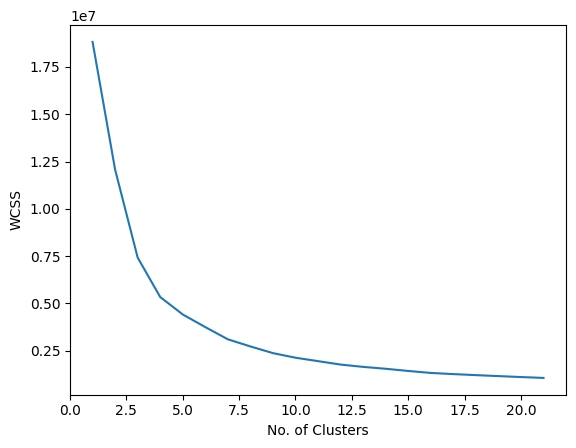

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,22),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")

**K means implementation and designating the clusters as new class labels**

In [ ]:
X = df2.iloc[:,:].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(X)

num_clusters =10
kmeans = KMeans(n_clusters=num_clusters, random_state=42,max_iter=1000)
df['new_class_label'] = kmeans.fit_predict(numeric_features_scaled)
df.to_csv('new_crop_dataset.csv')
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,N,P,K,temperature,humidity,ph,rainfall,label,crop_num,new_class_label
1451,101,17,47,29.494014,94.729813,6.185053,26.308209,muskmelon,9,4
1334,98,8,51,26.179346,86.522581,6.259336,49.430510,watermelon,10,4
1761,59,62,49,43.360515,93.351916,6.941497,114.778071,papaya,6,7
1735,44,60,55,34.280461,90.555616,6.825371,98.540477,papaya,6,7
1576,30,137,200,22.914300,90.704756,5.603413,118.604465,apple,8,3
...,...,...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange,7,8
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,banana,13,1
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,mango,12,5
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,grapes,11,3


**Dictionary for mapping new cluster labels with old crop labels and tracking frequency of each crop label under a particualr cluster**

In [ ]:
label_dict = {}
key_dict={}
for index, row in df.iterrows():
    new_label = row['new_class_label']
    old_label = row['crop_num']

    if new_label not in label_dict:
        label_dict[new_label] = set()

    label_dict[new_label].add(old_label)
for k1 in label_dict.keys():
  keys_dict={}
  for val in label_dict[k1]:
    for index,row in df.iterrows():
      if row['crop_num'] == val and row['new_class_label'] == k1:
        if val not in keys_dict.keys():
          keys_dict[val]=0
        keys_dict[val]+=1
  key_dict[k1]=keys_dict
for key in key_dict.keys():
  print("Cluster: ",key)
  for k in key_dict[key].keys():
    print("Crop label: ",k,"  frequency: ",key_dict[key][k])
  print("\n")

Cluster:  4
Crop label:  9   frequency:  100
Crop label:  10   frequency:  100


Cluster:  7
Crop label:  19   frequency:  3
Crop label:  6   frequency:  58
Crop label:  7   frequency:  18


Cluster:  3
Crop label:  8   frequency:  100
Crop label:  11   frequency:  100


Cluster:  5
Crop label:  18   frequency:  42
Crop label:  19   frequency:  55
Crop label:  12   frequency:  89


Cluster:  6
Crop label:  2   frequency:  1
Crop label:  6   frequency:  13
Crop label:  7   frequency:  2
Crop label:  12   frequency:  11
Crop label:  15   frequency:  96
Crop label:  16   frequency:  100
Crop label:  17   frequency:  100
Crop label:  18   frequency:  58
Crop label:  19   frequency:  9


Cluster:  8
Crop label:  6   frequency:  3
Crop label:  5   frequency:  100
Crop label:  14   frequency:  100
Crop label:  7   frequency:  80


Cluster:  2
Crop label:  1   frequency:  100
Crop label:  3   frequency:  100
Crop label:  6   frequency:  18
Crop label:  19   frequency:  1
Crop label:  22   freq

**Extracting Input parameter values (x) and target label value(Y) from the new labelled dataset**

In [ ]:
x = df.drop(['crop_num','label','new_class_label'],axis=1)
y = df['new_class_label']
x

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [ ]:
y

1451    4
1334    4
1761    7
1735    7
1576    3
       ..
1638    8
1095    1
1130    5
1294    3
860     6
Name: new_class_label, Length: 2200, dtype: int32

**Importing ML classifier Models**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

**Designing a dictionary of Model names mapped to the corresponding model classes**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

In [ ]:
def model_score(model,X_train,X_test,Y_train,Y_test):
  model.fit(X_train,Y_train);
  return model.score(X_test,Y_test)

**Creating a dictionary of model names mapped to their accuracy scores(initialised as 0)**

In [ ]:
models_accuracy = {
    'Logistic Regression': 0,
    'Support Vector Machine': 0,
    'K-Nearest Neighbors': 0,
    'Decision Tree': 0,
    'Random Forest': 0,
}

**Performing K Fold cross validation for all models and generating classification report**

In [ ]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=3, shuffle=True, random_state=42)  # Adding shuffle for randomness
for name, md in models.items():
    scores = []
    print("For Model:",name)
    i=1
    for train_index, test_index in folds.split(x, y):
        X_train, X_test, Y_train, Y_test = x.iloc[train_index], x.iloc[test_index], \
                                           y.iloc[train_index], y.iloc[test_index]
        md.fit(X_train, Y_train)
        y_pred = md.predict(X_test)
        report = classification_report(Y_test, y_pred)
        print("\nReport for:",i,"\n",report)
        i=i+1
        scores.append(accuracy_score(Y_test, y_pred) * 100)
    avg=np.mean(scores)
    models_accuracy[name]=avg;
    print(f"{name} with accuracy: {scores}\nAverage accuracy score: {avg}\n")

For Model: Logistic Regression

Report for: 1 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.97      0.96      0.97       109
           2       0.94      0.96      0.95       106
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        62
           5       0.81      0.85      0.83        65
           6       0.93      0.91      0.92       130
           7       0.81      0.72      0.76        29
           8       0.99      1.00      0.99        89
           9       0.97      0.97      0.97        35

    accuracy                           0.94       734
   macro avg       0.93      0.93      0.93       734
weighted avg       0.94      0.94      0.94       734


Report for: 2 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86        42
           1       0.98      1.00      0.99       116
           2 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Report for: 3 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.99      0.97      0.98       120
           2       0.96      0.99      0.97        75
           3       1.00      1.00      1.00        76
           4       1.00      0.99      0.99        74
           5       0.97      0.84      0.90        68
           6       0.94      0.98      0.96       123
           7       0.73      0.92      0.81        24
           8       0.99      0.97      0.98        92
           9       0.94      1.00      0.97        34

    accuracy                           0.96       733
   macro avg       0.95      0.96      0.95       733
weighted avg       0.97      0.96      0.96       733

Logistic Regression with accuracy: [94.27792915531336, 94.6793997271487, 96.31650750341065]
Average accuracy score: 95.0912787952909

For Model: Support Vector Machine

Report for: 1 
               precision    recall  f1-s

**plotting the Learning curves for the different models**

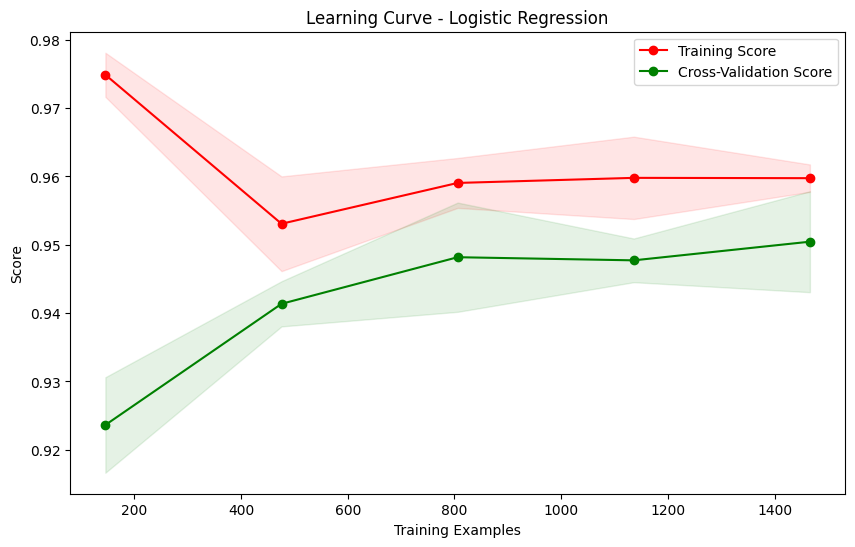

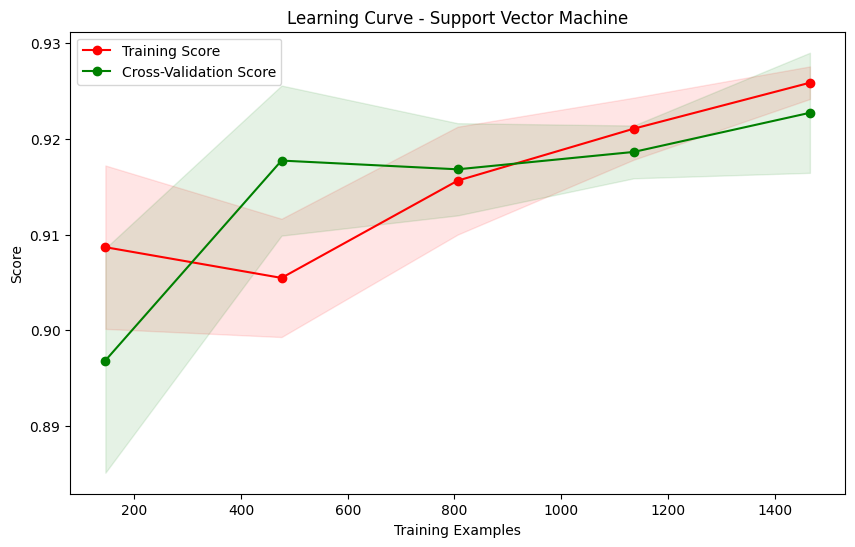

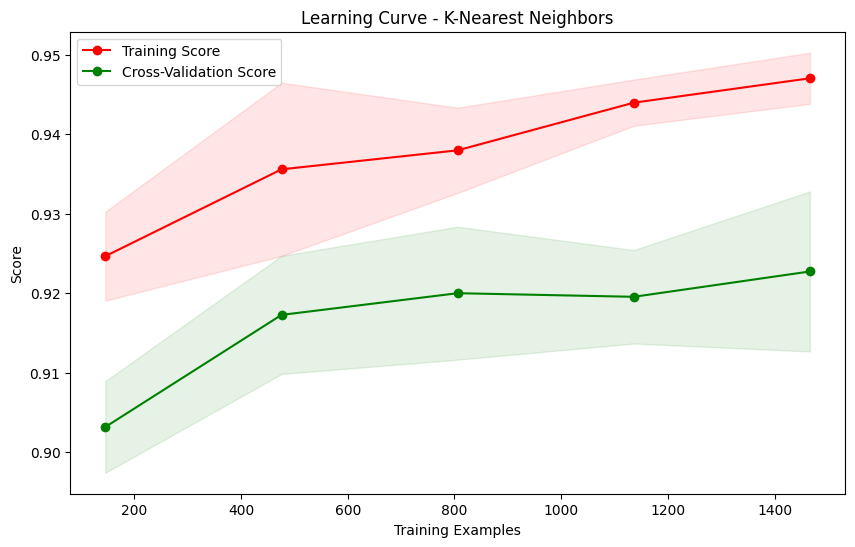

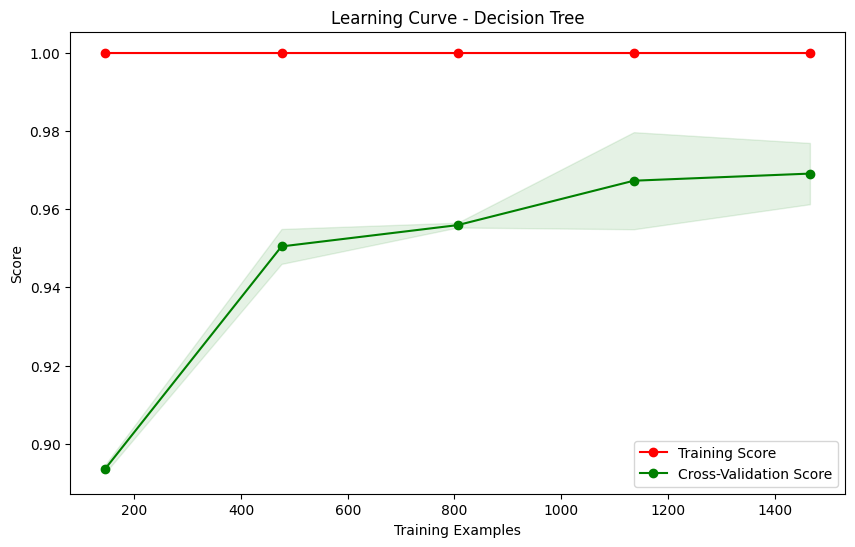

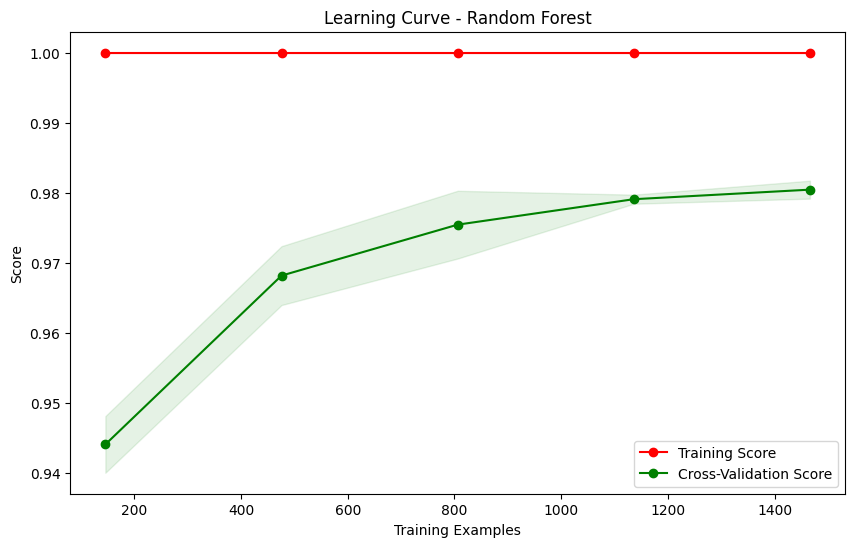

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming 'import numpy as np' is present in your code

for name, md in models.items():
    train_sizes, train_scores, test_scores = learning_curve(md, x, y, cv=folds, scoring='accuracy', n_jobs=-1)

    # Calculate mean and standard deviation of training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting learning curves
    plt.figure(figsize=(10, 6))
    plt.title(f'Learning Curve - {name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")

    plt.legend(loc="best")
    plt.show()


In [ ]:
y

1451    6
1334    6
1761    7
1735    7
1576    1
       ..
1638    3
1095    0
1130    2
1294    1
860     7
Name: new_class_label, Length: 2200, dtype: int32

**Selecting the best Model based on accuracy**

In [ ]:
best_model=list(models_accuracy.keys())[list(models_accuracy.values()).index(max(models_accuracy.values()))]
best_model

'Random Forest'

**Prediction**

In [ ]:
input=[[99,18,47,31,85,6.2,27]]
m=models[best_model]
cluster_label=m.predict(input)[0]
predicted_crop_dict=key_dict[cluster_label]
#traversing the dictionary of crops under a particular cluster to find crop labels whose frequencies under that cluser are more than 50
for key in predicted_crop_dict.keys():
  if (predicted_crop_dict[key]>=50):
    print(reversed_dict[key])


muskmelon
watermelon


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
input=[[61,37,40,27,92,5.5,148]]
m=models[best_model]
cluster_label=m.predict(input)[0]
predicted_crop_dict=key_dict[cluster_label]
#traversing the dictionary of crops under a particular cluster to find crop labels whose frequencies under that cluser are more than 50
for key in predicted_crop_dict.keys():
  if (predicted_crop_dict[key]>=50):
    print(reversed_dict[key])


rice
jute
coffee


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
